# #SuperNaive K-medoids Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euclideanDistance(x, y):
    '''
    Euclidean distance between x, y
    --------
    Return
    d: float
    '''
    squared_d = 0
    for i in range(len(x)):
        squared_d += (x[i] - y[i])**2
    d = np.sqrt(squared_d)
    return d

In [3]:
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        ''' 
        Class constructor
        Parameters
        ----------
        - k: number of clusters. 
        - max_iter: number of times centroids will move
        - has_converged: to check if the algorithm stop or not
        '''
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):
        ''' 
        Parameters
        ----------
        X: input data. 
        '''
        self.medoids = []
        
        #Starting medoids will be random members from data set X
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)
        
    def isConverged(self, new_medoids):
        '''
        Parameters
        ----------
        new_medoids: the recently calculated medoids to be compared with the current medoids stored in the class
        '''
        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
        
    def updateMedoids(self, X, labels):
        '''
        Parameters
        ----------
        labels: a list contains labels of data points
        '''
        self.has_converged = True
        
        #Store data points to the current cluster they belong to
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        
        #Calculate the new medoids
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                #Cost of the current data points to be compared with the current optimal cost
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #Now we have the optimal medoid of the current cluster
            new_medoids.append(new_medoid)
        
        #If not converged yet, accept the new medoids
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def fit(self, X):
        '''
        FIT function, used to find clusters
        Parameters
        ----------
        X: input data. 
        '''
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            #Labels for this iteration
            cur_labels = []
            for medoid in range(0,self.k):
                #Dissimilarity cost of the current cluster
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    #Distances from a data point to each of the medoids
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclideanDistance(self.medoids[j], X[k]))
                    #Data points' label is the medoid which has minimal distance to it
                    cur_labels.append(d_list.index(min(d_list)))
                    
                    self.medoids_cost[medoid] += min(d_list)
                                
            self.updateMedoids(X, cur_labels)
            
            if self.has_converged:
                break

        return np.array(self.medoids)

        
    def predict(self,data):
        ''' 
        Parameters
        ----------
        data: input data.
        
        Returns:
        ----------
        pred: list cluster indexes of input data 
        '''
    
        pred = []
        for i in range(len(data)):
            #Distances from a data point to each of the medoids
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclideanDistance(self.medoids[j],data[i]))
                
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

## Generating data and testing the above implementation

In [4]:
np.random.seed(8)

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

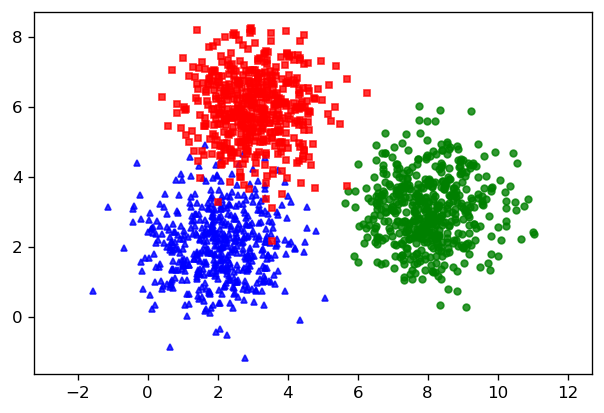

In [5]:
def visualize(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    #you can fix this dpi 
    plt.figure(dpi=120)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
visualize(X, original_label)

***#SuperNaive K-medoids***

Centers found by your model:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


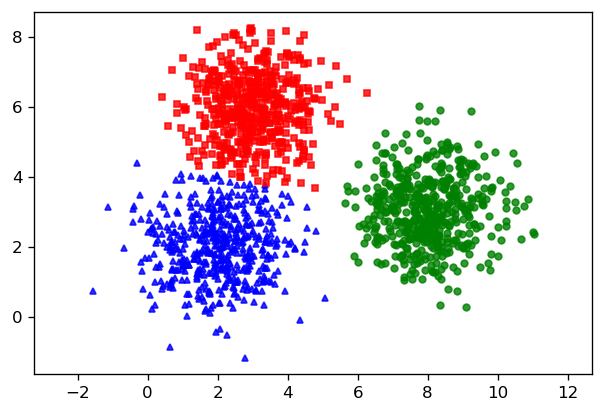

In [6]:
model=k_medoids(k=3)
print('Centers found by your model:')
print(model.fit(X))

pred = model.predict(X)

visualize(X,pred)

As you can see, our implementation takes a lot of time to finish.

Now, we will test again with sklearn_extra (this is an independent contribution, not came along with sklearn, you have to install it first)

***sklearn_extra K-medoids***

Centers found by scikit-learn extra:
[[1.98413249 2.04159709]
 [7.93224207 3.0213355 ]
 [2.98493437 5.97312308]]


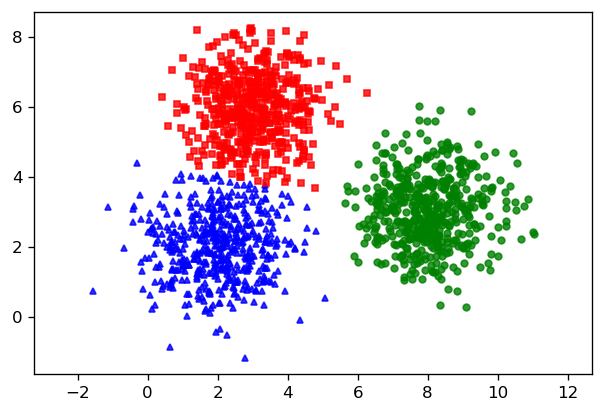

In [7]:
from sklearn_extra.cluster import KMedoids
model1 = KMedoids(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn extra:')
print(model1.cluster_centers_)
pred_label = model1.predict(X)
visualize(X, pred_label)

So much faster.
But the result stays the same to our implementation.

## Testing it on Iris data set

In [8]:
from sklearn import datasets
iris = datasets.load_iris()

In [9]:
X = []
X = iris.data
y = iris.target

Text(0, 0.5, 'Petal Width')

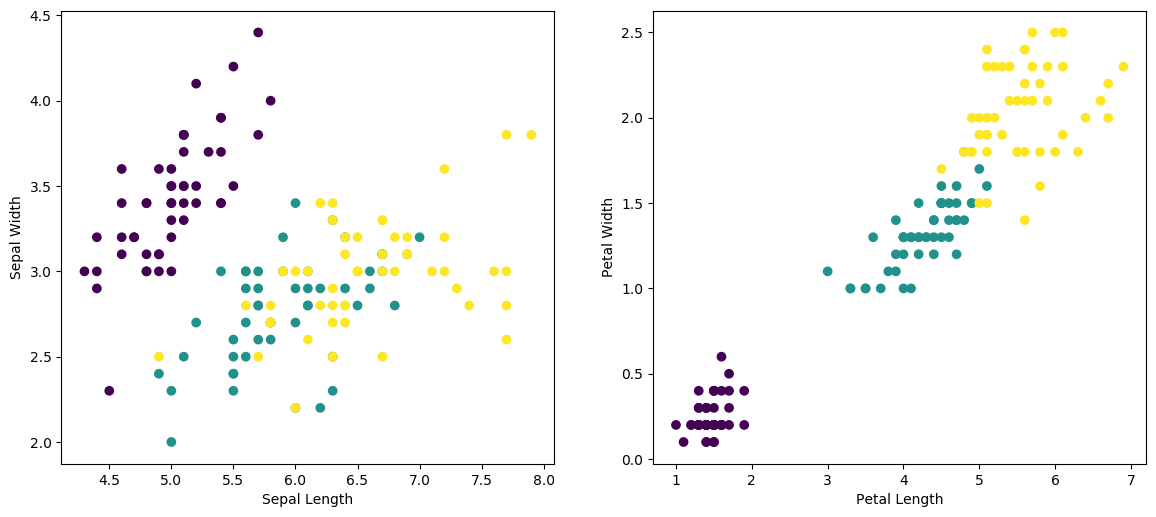

In [10]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')

In [12]:
#Run this cell twice or more
#I don't know why but on the first run, it gives wrong results

D=X[:,2:]
cluster_num=3
model = k_medoids(k=cluster_num)
centers = model.fit(D)
print(centers)

[[4.4 1.4]
 [1.4 0.2]
 [5.6 2.1]]


Text(0.5, 1.0, 'Predicted')

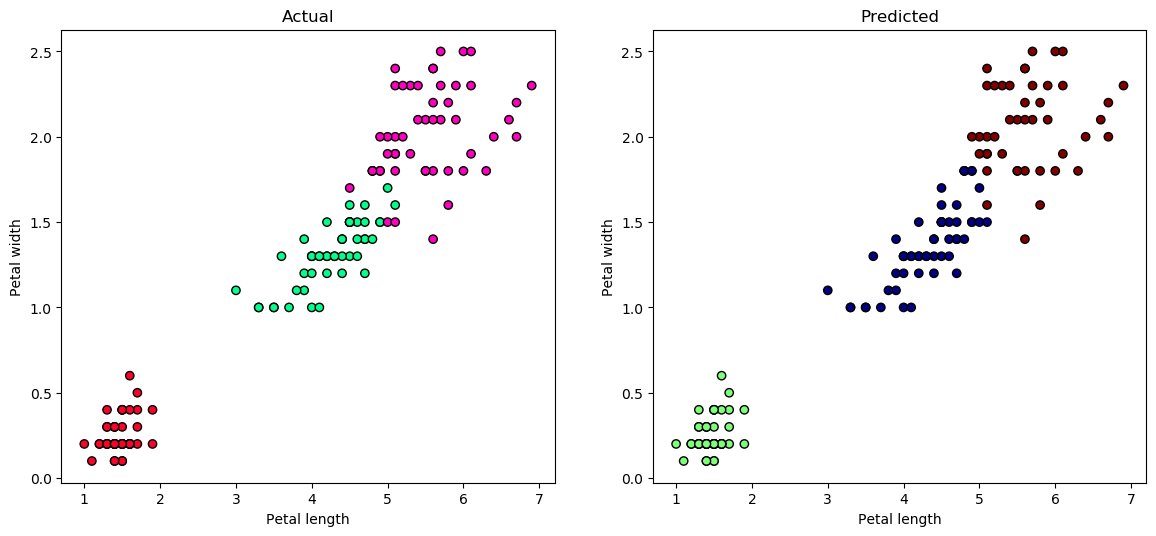

In [13]:
new_labels = model.predict(D)
#Plot the identified clusters and compare with our result
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

In [14]:
diff = 0
for i in range(0, cluster_num):
    count_y = 0
    count_labels = 0
    for j in range(len(y)):
        if y[j] == i:
            count_y += 1
        if new_labels[j] == i:
            count_labels += 1
    diff += abs(count_y - count_labels)

print("Diff = ",diff)
print("Precision of prediction = ",((len(y) - diff)/len(y))*100)

Diff =  12
Precision of prediction =  92.0
